In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
from sklearn.datasets import make_blobs

def twoClasses():
    #part 1
    X, y = make_blobs(n_samples=30, centers=2, random_state=4)

    #part 3
    #y[7] = 0
    #y[27] = 0
    y[[7, 27]] = 0

    #part 4
    remove = [0, 1, 5, 26]
    y = np.delete(y, remove)
    X = np.delete(X, remove, axis=0) # axis=0 is for rows, axis=1 is for columns
    return X, y

In [18]:
X, y = twoClasses()
print(X.shape, y.shape)

(26, 2) (26,)


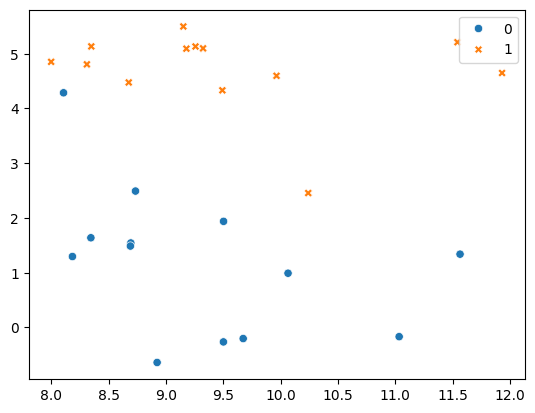

In [19]:
#part 2
g = sb.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y)
plt.show()

Question 2 – k-NN – Generalization

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

In [25]:
cancer.keys()
# X = cancer.data
# y = cancer.target


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=66, shuffle=True, stratify=cancer.target)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


Training accuracy with k=1: 1.0
Test accuracy with k=1: 0.9210526315789473


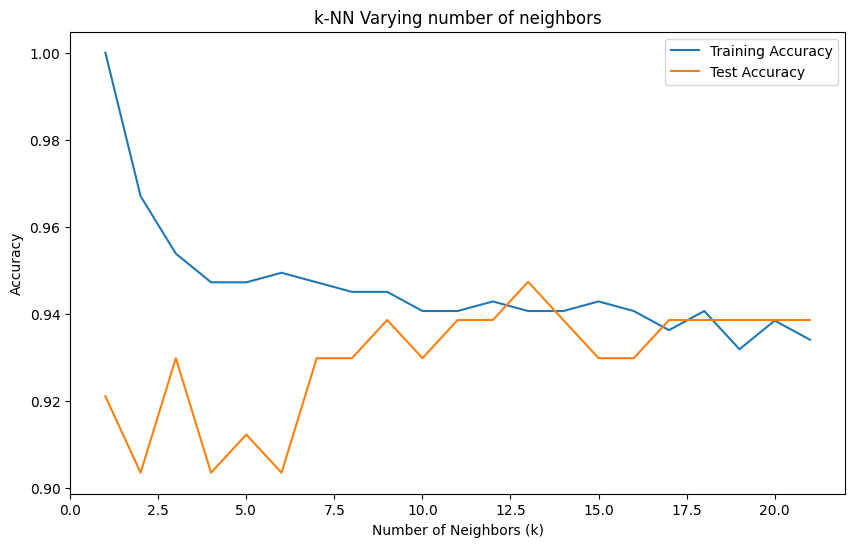

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 5: Learn the model with k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Display predictions and compute accuracy
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy with k=1: {train_accuracy}")
print(f"Test accuracy with k=1: {test_accuracy}")

# Step 7: Record the score for k=1 to 21
train_accuracies = []
test_accuracies = []

for k in range(1, 22):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))

# Step 8: Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 22), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 22), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Varying number of neighbors')
plt.legend()
plt.show()